---

<h1><center>SDSE Lab 3 <br><br> K-means clustering </center></h1>

---

In [89]:
result = {
    'SIDs': [27055041,3034243294, 3038584603, 3038619846] # enter the SIDs for the group members
}

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats

# 1) Load the data
Use `pickle.load` to load `data2d.pickle`. This file contains a single matrix called `X`. Use variables `N` and `D` for the number of rows (samples) and columns (features) respectively. (2 pts)

In [91]:
with open('data2d.pickle','rb') as file:
    X = pickle.load(file)
    
N = X.shape[0]
D = X.shape[1]

In [92]:
################################
# Reporting. Do not modify.#####
result['N'] = N   # 1 point
result['D'] = D   # 1 point
################################

# 2) Scatter plot
Create a scatter plot with the first column along the x-axis and the second column along the y-axis. Use `plt.axis('equal')` to force the two axes to have the same scale. This is important for correct visualization of the Euclidean distances between points. Save your figure handle to `fig2`.

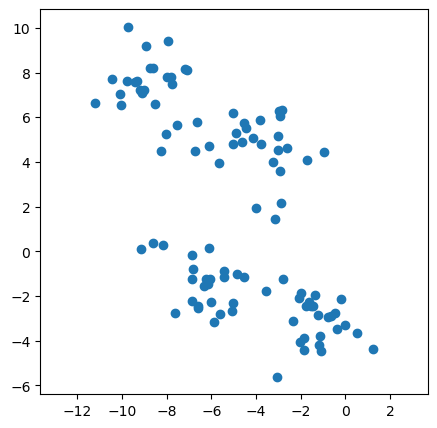

In [93]:
fig2 = plt.figure(figsize=(5,5))
# ADD YOUR CODE HERE
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


In [94]:
################################
# Reporting. Do not modify.#####
result['fig2'] = fig2  # 2 points
################################

# 3) Initialize centroids
Complete the function below that takes the number of centroids `K` and the data matrix `X` and returns `K` randomly placed centroids. The centroids should be selected according to a uniform distribution that spans a box fitted to the data. The return value should be a numpy array with shape `(K,D)` where `D` is the number of columns in X. Make sure this function  works for for values of `D` other than 2.

In [95]:
def initialize_centroids(K,X):
    # REMOVE THE pass AND ADD YOUR CODE HERE
    D = len(X[0])
    centroid_arr = np.empty((K, D))
    for d in range(D):
        x = X[:, d]
        centroid_arr[:, d] = np.random.uniform(low = min(x), high = max(x), size = K)
    
    return centroid_arr
    


In [96]:
################################
# Reporting. Do not modify.#####
result['C3'] = initialize_centroids(3,X)   # 6 points
################################

# 4) Compute the assignment for given centroids
Complete the function below that takes the data matrix and centroid locations, and returns an assignment matrix `gamma`. `gamma` should be a numpy array with shape `(N,K)`. Each row of `gamma` should contain `K-1` `False` values and one `True` value in the position corresponding to the centroid that is nearest to that data point (Euclidean distance). Hint: `np.argmin`.

In [97]:
def assign_samples_to_nearest_centroid(X,C):
    N = X.shape[0]
    K = C.shape[0]
    gamma = np.zeros((N,K),dtype=bool)
    # print(X)
    # print(np.argmin(X, axis = 1))
    # print(gamma)
    # ADD YOUR CODE HERE
    # print(X)
    # print(C)
    for i in range(N):
        x_point = X[i]
        centroid_tracker = []
        for centroids in C:
            euc = np.linalg.norm(x_point - centroids)
            centroid_tracker.append(euc)
        centroid_array = np.array(centroid_tracker)
        index_closest_centroid = np.argmin(centroid_array)
        # print(index)
        gamma[i][index_closest_centroid] = True

    # return None if all False in a column
    # for column in range(K):
    #     if not np.any(gamma[:,column]):
    #         return None

    # print(gamma)

    return gamma

In [98]:
################################
# Reporting. Do not modify.#####
result['gamma4'] = assign_samples_to_nearest_centroid(X,result['C3'])    # 6 points
################################

# 5) Plot data, centroids, assignment
Complete the function below that takes the data matrix, a set of centroids, and an assignment matrix and creates a scatter plot similar to the one shown here. The centroids should be indicated with a large dot, and the data samples should be color-coded according to their cluster membership. Your plot may not look identical to this one due to the random placement of the centroids.

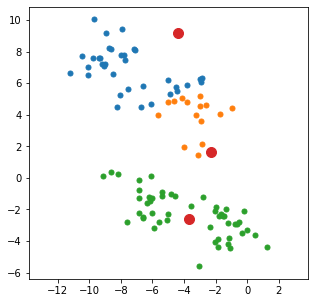

In [99]:
def plot_scatter(X, C, gamma):
    K = gamma.shape[1]
    fig = plt.figure(figsize=(5,5))
    
    # ADD YOUR CODE HERE
    for k in range(K):
        assignments = gamma[:, k]
        cluster_points = X[assignments]
        # print(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1])

    plt.scatter(C[:, 0], C[:, 1], s = 100, color = 'red')
    plt.axis('equal')
    
    
    return fig

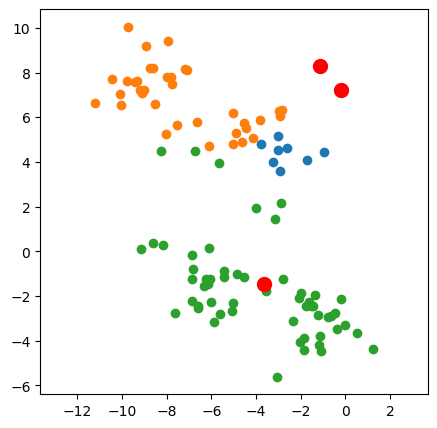

In [100]:
################################
# Reporting. Do not modify.#####
result['fig5'] = plot_scatter(X, result['C3'], result['gamma4'])    # 6 points
################################

---

# An aside on boolean indexing

Boolean indexing is a useful way of selecting a sub-array from a larger array according to some condition. 

For example, suppose we have an array `A` of length 4, consisting of the integers from 0 to 3. 

In [101]:
A = np.arange(4)

Here is how you can extract the zeroth and 2nd elements of `A` using boolean indexing:

In [102]:
A[[True,False,True,False]]

array([0, 2])

That is, you pass the boolean array `[True,False,True,False]` as a `selector` to `A[selector]`. This technique is useful when the boolean selector is created with a condition on the values of `A`. For example, if you wanted to extract all the values that are greater than 1.4:

In [103]:
selector = A>1.4
A[selector]

array([2, 3])

or simply:

In [104]:
A[A>1.4]

array([2, 3])

**Optional challenge:**
    
Define `A` as an array of integers from 0 to 9.
1. Find the sum of elements of A that are even numbers.
2. Find the sum of elements of A that are greater than seven.

In [105]:
A = np.arange(10)
print(sum(A[A%2==0]))
print(sum(A[A>7]))

20
17


---

# 6) Compute the centroids for a given assignment
Complete the function below that takes the assignment and the data matrix and returns centroids placed at the mean of each cluster. The return value should be a numpy array with shape `(K,D)`.

In [106]:
def place_centroids(gamma, X):
    K = gamma.shape[1]
    D = X.shape[1]
    C = np.empty((K,D))
    # ADD YOUR CODE HERE
    for k in range(K):
        assignments = gamma[:, k]
        cluster_points = X[assignments]
        cluster_centroid = np.mean(cluster_points, axis = 0)
        C[k, :] = cluster_centroid

    # X1, X2, X3 = [], [], []
    # for i in range(len(gamma)):
    #     index = np.where(gamma[i] == True)
    #     if index[0][0] == 0:
    #         X1.append(X[i])
    #     elif index[0][0] == 1:
    #         X2.append(X[i])
    #     else:
    #         X3.append(X[i])

    # X1 = np.array(X1)
    # X2 = np.array(X2)
    # X3 = np.array(X3)

    # C[0] = X1.mean(axis = 0)
    # C[1]= X2.mean(axis = 0)
    # C[2] = X3.mean(axis = 0)

    return C

In [107]:
################################
# Reporting. Do not modify.#####
result['C6'] = place_centroids(result['gamma4'], X)    # 6 points
################################

# 7) Code K-means
Now we will use some of the functions we've developed to code the full k-means algorithm. 

Most of the algorithm has been written for you in terms of the functions you've already implemented. Your task is only to write the stopping criterion, which is to stop as soon as the assignment `gamma` does not change from one iteration to the next.

In [108]:
def run_kmeans(X,C):

    done = False
    first = True
    gammaold = None
    while not done:

        gamma = assign_samples_to_nearest_centroid(X,C)
        if gamma is None:
            return None, None
        C = place_centroids(gamma, X)
        
        if np.any(np.isnan(C)):
            C = None
            gamma = None
            break

        if gammaold is not None and np.all(gamma == gammaold): # REPLACE THE True WITH THE CORRECT STOPPING CRITERION
            done = True
            break
            
        gammaold = gamma
        first = False

    return C, gamma

In [109]:
################################
# Reporting. Do not modify.#####
result['kmeans7'] = run_kmeans(X,result['C3'])    # 4 points
################################

# 8) Evaluate the cost function 
Complete the function below that evaluates the cost function (total inertia) for a given data matrix, centroid placement, and assignment matrix. The result is a scalar value.

$
J = \sum_{i=1}^{N} \sum_{k=1}^{K} \gamma_{i,k}( x_i - \mu_k )^2 
$

In [110]:
def eval_cost(X,C,gamma):
    K = gamma.shape[1]

    cost = 0# REPLACE THE None WITH THE CORRECT COST FUNCTION

    for i in range(len(X)):
        point = X[i]
        assignments = gamma[i, :]
        centroids = C[assignments]
        cost += np.linalg.norm(point - centroids)**2
    return cost

In [111]:
################################
# Reporting. Do not modify.#####
result['cost8'] = eval_cost(X,result['C3'],result['gamma4'])    # 6 points
################################

# 9) Ensemble run
Complete the function below that runs kmeans `ensemblesize` times, each with a different initial centroid placement. These initial placements should be chosen with `initialize_centroids(K,X)`. The function should return the single run with the lowest cost. Results should be returned in a **dictionary** with keys `('C','gamma','cost')`. `C` are the best centroids, `gamma` is t|he best assignment, and `cost` is the corresponding cost.

In [112]:
def ensemble_run(K,X,ensemblesize):
    best_run = {'C':None,'gamma':None,'cost':None}
    for e in range(ensemblesize):
        
        done = False
        while not done:
            C = initialize_centroids(K,X)
            C, gamma = run_kmeans(X,C)
            done = C is not None
            
        cost = eval_cost(X,C,gamma)
       
        # ADD CODE HERE THAT WILL KEEP ONLY THE BEST RUN
        if best_run['cost'] is None or cost < best_run['cost']:
            best_run['C'] = C
            best_run['gamma'] = gamma
            best_run['cost'] = cost
    
    return best_run

In [113]:
################################
# Reporting. Do not modify.#####
result['ens9'] = ensemble_run(3,X,100)    # 6 points
################################

# 10) Iteration over K
Complete the function below that takes the data matrix, a sample size, and a maximum number of clusters to consider (`maxK`).  The function should run `ensemble_run` for all values of `K` from 1 to `maxK`. It should return a numpy array of length `maxK-1` with the best case cost for each value of `K`.

In [114]:
def K_iteration(X, ensemblesize, maxK=10):
    allK = list(range(1,maxK))
    best_cost = np.empty(len(allK))
    # ADD CODE HERE
    for k in allK:
        best_run = ensemble_run(k, X, ensemblesize)
        best_cost[k - 1] = best_run['cost'] 

    print(best_cost)
    
    return best_cost

# 11) Selecting K

We now run `K_iteration` with `ensemblesize=200`, `maxK=10` and plot the result. The plot shows the percent improvement of each `K` over `K-1`. From this plot, choose an ideal value for `K` and report it in the results dictionary as `Kideal`.

[2895.67902369  981.02477219  616.56731334  265.58230558  223.91615237
  192.59481366  162.47747163  141.60084967  121.89760075]


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

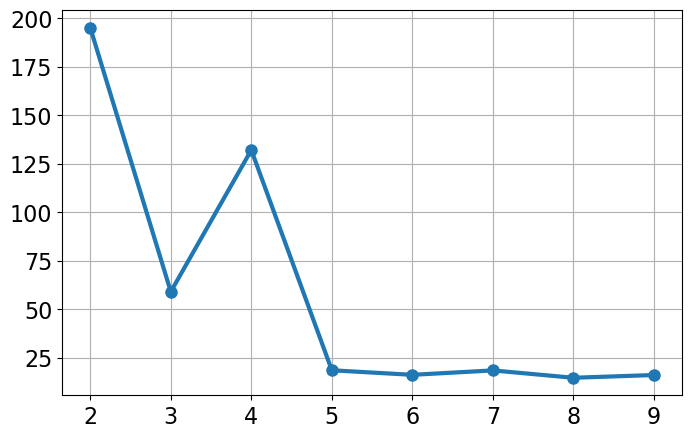

In [115]:
ensemblesize = 200
maxK=10
best_cost = K_iteration(X, ensemblesize, maxK)

fig11 = plt.figure(figsize=(8,5))
allK = list(range(1,maxK))
plt.plot(allK[1:],100*np.abs(np.diff(best_cost)) / best_cost[1:],
         linewidth=3,
         marker='o',
         markersize=8)

plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [116]:
# REPLACE THE None WITH YOUR Kideal VALUE.

Kideal = 4

In [117]:
################################
# Reporting. Do not modify.#####
result['fig11'] = fig11      # 6 points
result['Kideal'] = Kideal    # 4 points
################################

---
## Do not modify below this

In [118]:
with open('{}.pickle'.format("_".join([str(sid) for sid in result['SIDs']])),'wb') as file:
    pickle.dump(result,file)